# **Overall Analysis till 2016**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

In [12]:
df = pd.read_csv('/content/athlete_events.csv')
region_df = pd.read_csv('/content/noc_regions.csv')

#Dataset View

In [13]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
192301,96555,Olaf Klitgaard Poulsen (-Klitgaard),M,22.0,NaN,NaN,Denmark,DEN,1936 Summer,1936.0,Summer,Berlin,Rowing,Rowing Men's Coxed Eights,NaN
192302,96556,Ole Poulsen (-Van der Heide),M,22.0,176.0,75.0,White Lady,DEN,1964 Summer,1964.0,Summer,Tokyo,Sailing,Sailing Mixed Three Person Keelboat,Gold
192303,96557,Poul Byrge Poulsen,M,21.0,NaN,NaN,Denmark,DEN,1936 Summer,1936.0,Summer,Berlin,Rowing,Rowing Men's Coxed Eights,NaN
192304,96558,Poul Anders Kjr Poulsen,M,28.0,181.0,82.0,Denmark,DEN,1980 Summer,1980.0,Summer,Moskva,Handball,Handball Men's Handball,NaN
192305,96559,Ren Holten Poulsen,M,19.0,188.0,92.0,Denmark,DEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [15]:
df.shape

(192306, 15)

#If we want to analysis of Only summer Olympic Analaysis then

In [16]:
df = df[df['Season']=='Summer']

In [17]:
df.shape

(158328, 15)

# Merge Both the Datasets for Replacing the Region an NOC

In [18]:
df = df.merge(region_df,on='NOC',how='left')

In [19]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
158323,96552,Katja Brix Poulsen,F,23.0,175.0,73.0,Denmark,DEN,2000 Summer,2000.0,Summer,Sydney,Archery,Archery Women's Individual,NaN,Denmark,NaN
158324,96555,Olaf Klitgaard Poulsen (-Klitgaard),M,22.0,NaN,NaN,Denmark,DEN,1936 Summer,1936.0,Summer,Berlin,Rowing,Rowing Men's Coxed Eights,NaN,Denmark,NaN
158325,96556,Ole Poulsen (-Van der Heide),M,22.0,176.0,75.0,White Lady,DEN,1964 Summer,1964.0,Summer,Tokyo,Sailing,Sailing Mixed Three Person Keelboat,Gold,Denmark,NaN
158326,96557,Poul Byrge Poulsen,M,21.0,NaN,NaN,Denmark,DEN,1936 Summer,1936.0,Summer,Berlin,Rowing,Rowing Men's Coxed Eights,NaN,Denmark,NaN
158327,96558,Poul Anders Kjr Poulsen,M,28.0,181.0,82.0,Denmark,DEN,1980 Summer,1980.0,Summer,Moskva,Handball,Handball Men's Handball,NaN,Denmark,NaN


#How many countries are participating in the Olympic

In [20]:
df['region'].unique().shape

(206,)

#Checking for duplicates

In [21]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         6521
Height     36891
Weight     38441
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     134477
region       217
notes     155236
dtype: int64

#Checking duplicates and dropping them

In [22]:
df.duplicated().sum()

1045

In [23]:
df.drop_duplicates(inplace=True)

# Count the No. of Gold, Silver and Bronze are given to the all Players till 2016

In [24]:
df['Medal'].value_counts()

Gold      8017
Bronze    7970
Silver    7856
Name: Medal, dtype: int64

# Convert the medal tally into separated columns and grouping them by the region.

In [25]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [26]:
df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,region,Gold,Silver,Bronze
0,USA,1756.0,982.0,868.0
1,Russia,808.0,652.0,685.0
2,Germany,695.0,648.0,707.0
3,UK,457.0,542.0,427.0
4,Italy,389.0,348.0,351.0
...,...,...,...,...
200,Lebanon,0.0,1.0,1.0
201,Lesotho,0.0,0.0,0.0
202,Albania,0.0,0.0,0.0
203,Libya,0.0,0.0,0.0


#Since the total number of medals per country is relatively high depending on the countries success in the Olympics we drop all duplicates country wise and make it boolean.

In [27]:
MedalTally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Season','Event','Medal'])

In [28]:
MedalTally=MedalTally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [29]:
MedalTally['Total'] = MedalTally['Gold']+MedalTally['Silver']+MedalTally['Bronze']
MedalTally

,region,Gold,Silver,Bronze,Total
0,USA,823.0,625.0,545.0,1993.0
1,Russia,432.0,368.0,355.0,1155.0
2,Germany,342.0,337.0,367.0,1046.0
3,UK,239.0,274.0,234.0,747.0
4,France,210.0,218.0,246.0,674.0
...,...,...,...,...,...
200,Lebanon,0.0,1.0,1.0,2.0
201,Lesotho,0.0,0.0,0.0,0.0
202,Albania,0.0,0.0,0.0,0.0
203,Libya,0.0,0.0,0.0,0.0


In [30]:
MedalTally[MedalTally['region']=='India']

,region,Gold,Silver,Bronze,Total
42,India,9.0,3.0,11.0,23.0


In [31]:
MedalTally

,region,Gold,Silver,Bronze,Total
0,USA,823.0,625.0,545.0,1993.0
1,Russia,432.0,368.0,355.0,1155.0
2,Germany,342.0,337.0,367.0,1046.0
3,UK,239.0,274.0,234.0,747.0
4,France,210.0,218.0,246.0,674.0
...,...,...,...,...,...
200,Lebanon,0.0,1.0,1.0,2.0
201,Lesotho,0.0,0.0,0.0,0.0
202,Albania,0.0,0.0,0.0,0.0
203,Libya,0.0,0.0,0.0,0.0


In [32]:
years = np.unique(df['Year'].dropna().values).tolist()

In [33]:
years.insert(0,'Overall')

In [34]:
years

['Overall',
 1896.0,
 1900.0,
 1904.0,
 1906.0,
 1908.0,
 1912.0,
 1920.0,
 1924.0,
 1928.0,
 1932.0,
 1936.0,
 1948.0,
 1952.0,
 1956.0,
 1960.0,
 1964.0,
 1968.0,
 1972.0,
 1976.0,
 1980.0,
 1984.0,
 1988.0,
 1992.0,
 1996.0,
 2000.0,
 2004.0,
 2008.0,
 2012.0,
 2016.0]

In [35]:
Country = np.unique(df['region'].dropna().values).tolist()

In [36]:
Country.sort()

In [37]:
Country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [38]:
Country.insert(0,'Overall')

In [39]:
Country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

#This function searches the year and country to find how many medals a specific country collected in a specific year

In [40]:
def fetch_medal_tally(df,years,Country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Season','Event','Medal'])
    flag = 0
    if years == 'Overall' and Country=='Overall':
        temp_df = medal_df
    if years == 'Overall' and Country!='Overall':
        flag=1
        temp_df = medal_df[medal_df['region']==Country]
    if years!= 'Overall' and Country == 'Overall':
        temp_df = medal_df[medal_df['Year']==int(years)]
    if years!='Overall' and Country!='Overall':
        temp_df = medal_df[(medal_df['region']==Country)&(medal_df['Year']==int(years))]
    
    
    if flag==1:
        x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=True).reset_index()
    else:
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['Total'] = x['Gold']+x['Silver']+x['Bronze']
    print(x)

In [42]:
fetch_medal_tally(df,years='2000',Country='Algeria')

    region  Gold  Silver  Bronze  Total
0  Algeria     1       0       2      3


# **Overall Analysis**

**No of Editions No. of Cities No. of Events and Sports No. of Athelet No. of Participating Nations**

In [43]:
df['Sport'].unique().shape

(51,)

In [44]:
df['Event'].unique().shape

(649,)

In [45]:
df['Name'].unique().shape

(82967,)

In [46]:
df['region'].unique().shape

(206,)

# No. of Participating Nations over the Years

In [49]:
nations_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')
nations_over_time

,index,Year
28,1896.0,10
22,1900.0,29
27,1904.0,14
25,1906.0,20
26,1908.0,20
24,1912.0,28
23,1920.0,28
20,1924.0,45
19,1928.0,46
21,1932.0,45


In [50]:
nations_over_time.rename(columns={'index':'Edition','Year':'No. of Nations'},inplace=True)

#Figure to show the increase of nations participating over the years

In [51]:
import plotly.express as px

In [52]:
fig = px.line(nations_over_time,x="Edition",y="No. of Nations")
fig.show()

In [53]:
# No. of Sports over Edition
df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('index')

,index,Year
28,1896.0,43
26,1900.0,90
25,1904.0,95
27,1906.0,73
23,1908.0,109
24,1912.0,107
14,1920.0,156
20,1924.0,131
22,1928.0,122
21,1932.0,130


In [54]:
#No. of Sports over Editions
df.drop_duplicates(['Year', 'Sport'])['Year'].value_counts().reset_index().sort_values('index')

,index,Year
28,1896.0,9
17,1900.0,20
23,1904.0,18
27,1906.0,13
10,1908.0,24
26,1912.0,17
9,1920.0,25
16,1924.0,20
24,1928.0,17
25,1932.0,17


In [55]:
df.drop_duplicates(['Year', 'Name'])['Year'].value_counts().reset_index().sort_values('index')

,index,Year
28,1896.0,132
25,1900.0,921
27,1904.0,438
26,1906.0,597
23,1908.0,1458
22,1912.0,1727
21,1920.0,1953
18,1924.0,2345
20,1928.0,2280
24,1932.0,1421


# Next we drew a Heatmap, in which we gave the No. of all events for every sport over the Olympic editions

In [56]:
x = df.drop_duplicates(['Year','Sport','Event'])

<AxesSubplot:xlabel='Year', ylabel='Sport'>

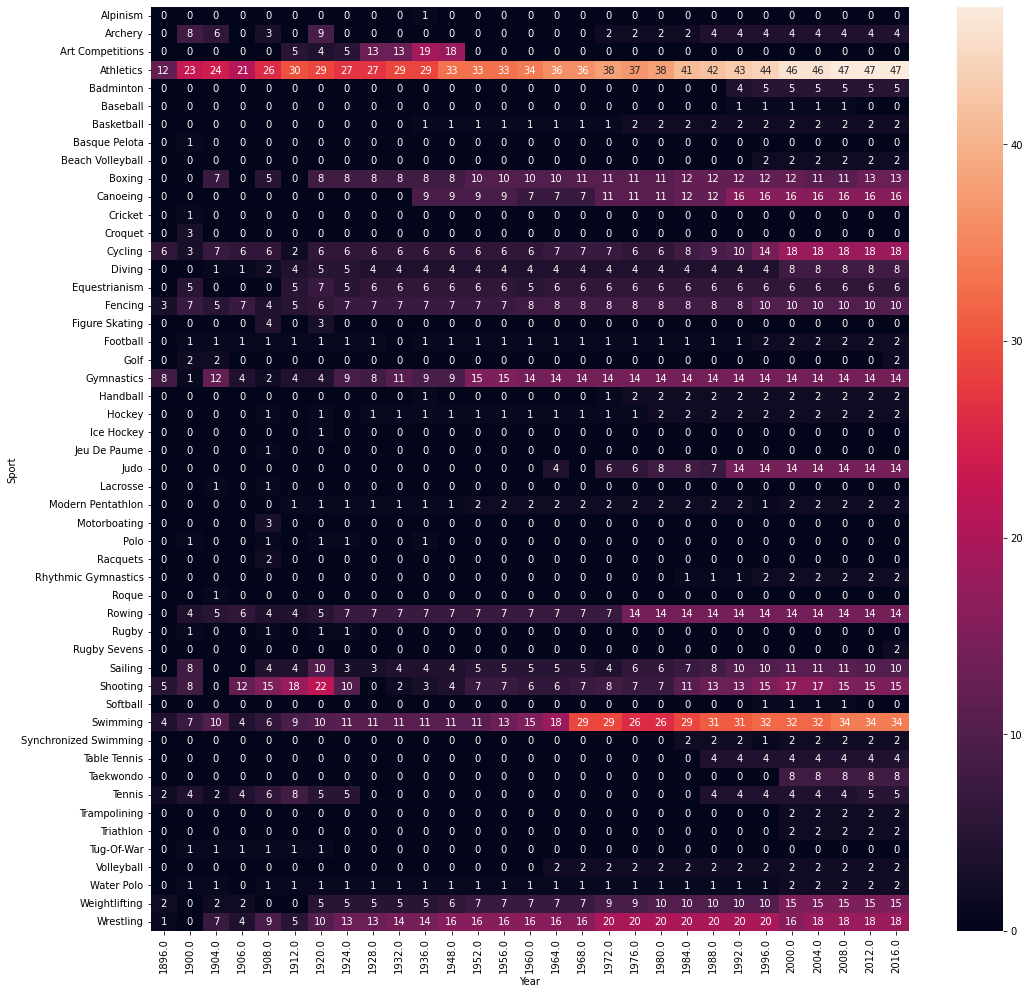

In [57]:
plt.figure(figsize=(17,17))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

# Lastly we find the most successful Atheletes in every game

In [58]:
def most_successfull(df,Sport):
    temp_df = df.dropna(subset=['Medal'])
    
    if(Sport!='Overall'):
        temp_df = temp_df[temp_df['Sport']==Sport]
        
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x

In [60]:
most_successfull(df,'Wrestling')

,Name,Medals,Sport,region
0,Wilfried Dietrich,5,Wrestling,Germany
8,Imre Polyk,4,Wrestling,Hungary
12,Kaori Icho,4,Wrestling,Japan
16,Aleksandr Aleksandrovich Karelin,4,Wrestling,Russia
20,Eino Aukusti Leino,4,Wrestling,Finland
24,Sren Marinus Jensen,4,Wrestling,Denmark
28,Bruce Robert Baumgartner,4,Wrestling,USA
32,Ivar Valentin Johansson,3,Wrestling,Sweden
36,Armen Lyudvikovich Nazaryan,3,Wrestling,Armenia
40,Karl-Erik Nilsson,3,Wrestling,Sweden
